# Worksheet 7 - Clustering
This workbook explores the animals with attributes dataset located at http://attributes.kyb.tuebingen.mpg.de, and includes the following sections:

1. Download and Read Data
2. K-means Clustering of Data
3. Heirarchical Clustering of Data

### 1.  Download and Read Data

In [1]:
# make sure we are in the correct directory
%cd /Users/joshwilson/Documents/DSE/jsw037/DSE210/

/Users/joshwilson/Documents/DSE/jsw037/DSE210


In [2]:
# create and move to 'data' directory (first delete the folder if it already exists)
!rm -rf 'ws7data'
!mkdir 'ws7data'
%cd ws7data

/Users/joshwilson/Documents/DSE/jsw037/DSE210/ws7data


In [3]:
# get the training set image data
!curl http://attributes.kyb.tuebingen.mpg.de/AwA-base.tar.bz2 -o 'AwA-base.tar.bz2'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1037k  100 1037k    0     0   221k      0  0:00:04  0:00:04 --:--:--  256k


In [4]:
# uncompress the data
!tar jxf AwA-base.tar.bz2

In [5]:
!ls

Animals_with_Attributes AwA-base.tar.bz2


In [6]:
%cd Animals_with_Attributes/
!ls

/Users/joshwilson/Documents/DSE/jsw037/DSE210/ws7data/Animals_with_Attributes
Features                        predicate-matrix-continuous.txt
README-attributes.txt           predicate-matrix.png
classes.txt                     predicates.txt
lampert-cvpr2009.pdf            testclasses.txt
predicate-matrix-binary.txt     trainclasses.txt


In [7]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [8]:
%matplotlib inline

In [9]:
np.random.seed(42)

In [10]:
# read data from matrix
with open('predicate-matrix-continuous.txt','r') as f:
    data = np.array([map(float, x.split()) for x in f.read().splitlines()])

# read animal classes
with open('classes.txt','r') as f:
    classes = np.array([x.split('\t')[1].replace('+',' ') for x in f.read().splitlines()])

# read features
with open('predicates.txt','r') as f:
    features = [x.split('\t')[1] for x in f.read().splitlines()]

In [11]:
def listFeatures(animal):
    animal_index = np.where(classes == animal)
    animal_data = data[animal_index]
    animal_features = zip(features, animal_data[0])
    return animal_features

### 2.  K-means Clustering of Data

In [12]:
# cluster data
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data)

# get animals in each cluster
clusters = []
print 'Animals by cluster:\n'
for i in range(num_clusters):
    cluster_i = classes[np.where(kmeans.labels_ == i)[0]]
    clusters.append(cluster_i)
    print 'cluster %i : %s' % (i, cluster_i)

Animals by cluster:

cluster 0 : ['antelope' 'horse' 'moose' 'giraffe' 'zebra' 'deer']
cluster 1 : ['tiger' 'leopard' 'fox' 'wolf' 'weasel' 'bobcat' 'lion']
cluster 2 : ['killer whale' 'blue whale' 'humpback whale' 'walrus' 'dolphin']
cluster 3 : ['skunk' 'mole' 'hamster' 'squirrel' 'rabbit' 'rat' 'mouse' 'raccoon']
cluster 4 : ['dalmatian' 'persian cat' 'german shepherd' 'siamese cat' 'chihuahua'
 'collie']
cluster 5 : ['hippopotamus' 'elephant' 'ox' 'sheep' 'rhinoceros' 'buffalo'
 'giant panda' 'pig' 'cow']
cluster 6 : ['spider monkey' 'gorilla' 'chimpanzee']
cluster 7 : ['bat']
cluster 8 : ['beaver' 'seal' 'otter']
cluster 9 : ['grizzly bear' 'polar bear']


#### K-means Clustering Discussion
The clusters make sense, as they all contain animals that are similar to one another.  All the cats and dogs, for example, are in cluster 4, the aquatic animals are in cluster 2 and 8, and the only two types of bears found in the dataset are in cluster 9.

### 3.  Heirarchical Clustering of Data

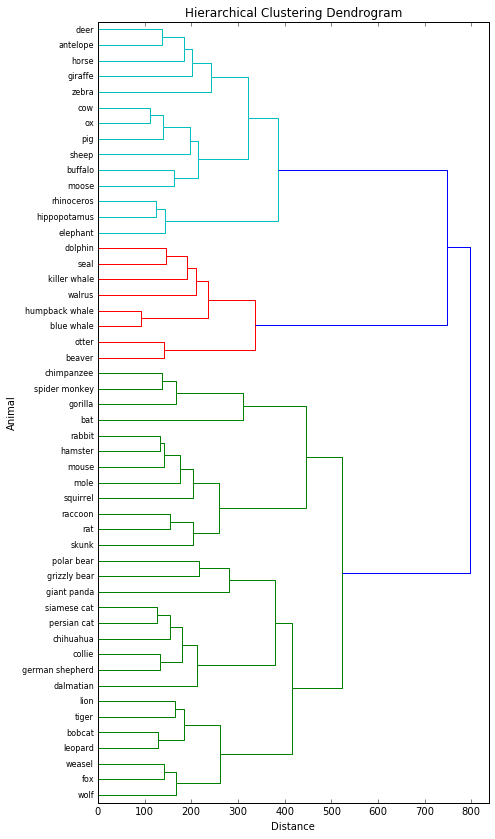

In [13]:
# perform heirarchical clustering
Z = linkage(data, 'ward')

'''
from pylab import rcParams
rcParams['figure.figsize'] = 5,10
'''

# plot dendrogram
plt.figure(figsize=(7, 14))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Animal')
plt.xlabel('Distance')
dendrogram(Z, orientation='right',labels=classes)
plt.show()

#### Heirarchical Clustering Discussion
The heirarchical clustering seems sensible.  Most similar types of animals are clustered together (siamese cat and persion cat, for example), and dissimilar animals are in distant clusters (whales and dogs).  It also appears that the single animal that is the furthest distance from its nearest cluster is the bat, which makes sense, as bats are the only flying mammal and have many features not shared even with animals to which they are most similar.

# Worksheet 8 - Problem 4

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

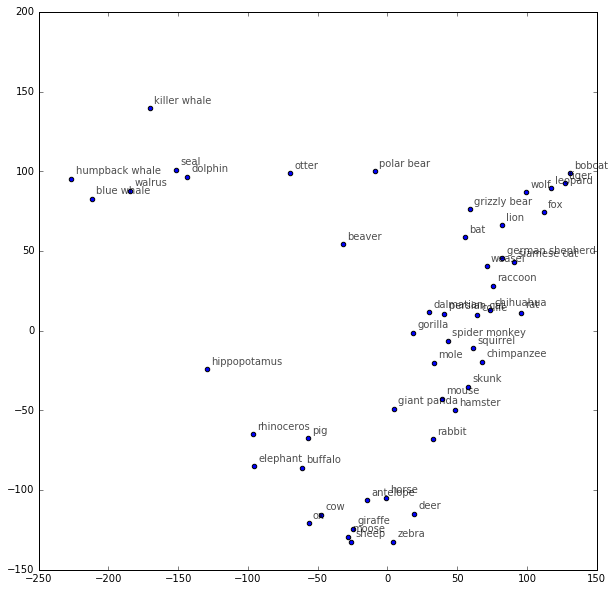

In [16]:
x=data_2d.transpose()[0]
y=data_2d.transpose()[1]
offset = 3

plt.figure(figsize = (10,10))
plt.scatter(x,y)

for i, animal in enumerate(classes):
    plt.annotate(animal, (x[i]+offset,y[i]+offset), alpha = 0.7)

#### Discussion of PCA Projection to 2-d
The projection to 2-d generally makes sense.  The aquatic animals are clustered together in the upper left area, and most similar animals are located near one another (zebra and horse, deer and antelope, hamster and mouse, etc.).